In [1]:
# -*- coding: UTF-8 -*-
import requests
import re
import datetime
import pandas as pd

from bs4 import BeautifulSoup
import warnings

warnings.filterwarnings('ignore')

headers = {'User-Agent':'Mozilla/5.0(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'}

# Acquire the Website for Each Press Conference <br> 使用requests库获取历次新闻发布会的网址 


In [2]:
url = 'https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_673025/'
data = requests.get(url, headers=headers).text
data = data.encode('latin1').decode('utf-8','ignore')
data

'<!DOCTYPE html>\n<html>\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<meta name="viewport" content="width=device-width, maximum-scale=1, initial-scale=1, user-scalable=yes">\n<meta name="SiteName" content="中华人民共和国外交部">\n<meta name="SiteDomain" content="www.mfa.gov.cn">\n<meta name="SiteIDCode" content="bm02000004">\n<meta name="ColumnName" content="例行记者会">\n<meta name="ColumnType" content="例行记者会">\n<meta name="ColumnDescription" content="例行记者会">\n<meta name="ColumnKeywords" content="例行记者会">\n<title>例行记者会_中华人民共和国外交部</title>\n<link rel="stylesheet" type="text/css" href="../../images/style_20210817.css" />\n<link rel="stylesheet" type="text/css" href="../../images/responsive_20210817.css">\n<script type="text/javascript" src="../../images/jquery1.42.min_20210817.js"></script>\n<script type="text/javascript" src="../../images/jquery.Slide.2.1.1_20210817.js"></script>\n<script src="../../images/TouchSlide.1.1_20210817.js"></script>\n<scri

In [3]:
# 用第一页来编写regex并检查
p_href = '<li><a href="(.*?)" target="_blank">'
href = re.findall(p_href, data)

p_title = 'target="_blank">(.*?)</a> </li>'
title = re.findall(p_title, data)

find_date = ''.join(title)
date = re.findall('\d{4}-\d{2}-\d{2}?', find_date)

for i in range(len(date)):
    date[i] = datetime.datetime.strptime(date[i],'%Y-%m-%d')
    href[i] = url + href[i][2:]
    
df = pd.DataFrame({'Title':title,
                  'Date':date,
                  'Link':href})
df

,Title,Date,Link
0,2022年7月15日外交部发言人汪文斌主持例行记者会（2022-07-15）,2022-07-15,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
1,2022年7月14日外交部发言人汪文斌主持例行记者会（2022-07-14）,2022-07-14,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
2,2022年7月13日外交部发言人汪文斌主持例行记者会（2022-07-13）,2022-07-13,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
3,2022年7月12日外交部发言人汪文斌主持例行记者会（2022-07-12）,2022-07-12,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
4,2022年7月11日外交部发言人汪文斌主持例行记者会（2022-07-11）,2022-07-11,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
5,2022年7月8日外交部发言人赵立坚主持例行记者会（2022-07-08）,2022-07-08,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
6,2022年7月7日外交部发言人赵立坚主持例行记者会（2022-07-07）,2022-07-07,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
7,2022年7月6日外交部发言人赵立坚主持例行记者会（2022-07-06）,2022-07-06,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
8,2022年7月5日外交部发言人赵立坚主持例行记者会（2022-07-05）,2022-07-05,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
9,2022年7月4日外交部发言人赵立坚主持例行记者会（2022-07-04）,2022-07-04,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...


In [4]:
for i in range(27):
    new_url = url + 'index_'+str(i+1)+'.shtml'
    data = requests.get(new_url, headers=headers).text
    data = data.encode('latin1').decode('utf-8','ignore')
    
    p_href = '<li><a href="(.*?)" target="_blank">'
    href = re.findall(p_href, data)

    p_title = 'target="_blank">(.*?)</a> </li>'
    title = re.findall(p_title, data)

    find_date = ''.join(title)
    date = re.findall('\d{4}-\d{2}-\d{2}?', find_date)

    if (len(title) == len(href)) and (len(title) == len(date)):
        for i in range(len(date)):
            date[i] = datetime.datetime.strptime(date[i],'%Y-%m-%d')
            href[i] = url + href[i][2:]

        df_tmp = pd.DataFrame({'Title':title,
                          'Date':date,
                          'Link':href})
        df = pd.concat([df,df_tmp], axis=0, ignore_index=True) # axis = 0 往下添加新的行，也可以不写
    else:
        print(f'Page. {i+1} + failed!')
        continue # 继续完成loop，最后一并debug
df

,Title,Date,Link
0,2022年7月15日外交部发言人汪文斌主持例行记者会（2022-07-15）,2022-07-15,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
1,2022年7月14日外交部发言人汪文斌主持例行记者会（2022-07-14）,2022-07-14,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
2,2022年7月13日外交部发言人汪文斌主持例行记者会（2022-07-13）,2022-07-13,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
3,2022年7月12日外交部发言人汪文斌主持例行记者会（2022-07-12）,2022-07-12,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
4,2022年7月11日外交部发言人汪文斌主持例行记者会（2022-07-11）,2022-07-11,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
...,...,...,...
947,2018年6月27日外交部发言人陆慷主持例行记者会（2018-06-27）,2018-06-27,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
948,2018年6月26日外交部发言人陆慷主持例行记者会（2018-06-26）,2018-06-26,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
949,2018年6月25日外交部发言人耿爽主持例行记者会（2018-06-25）,2018-06-25,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...
950,2018年6月22日外交部发言人耿爽主持例行记者会（2018-06-22）,2018-06-22,https://www.fmprc.gov.cn/fyrbt_673021/jzhsl_67...


In [60]:
import os
os.makedirs('MFA')

df.to_excel('MFA/Press Conference.xlsx',index=False)

我也在网页 https://www.mfa.gov.cn/web/wjdt_674879/fyrbt_674889/ 测试过，该网页只保留1000条，同时包括一些针对特定问题的声明，所以记者会的链接总数量会少一些。<br>
不过我更感兴趣的是，在这之前的记者会文稿，无法通过该网站获取了，但实际上仍然是存在的。如果获取这些“隐藏”的网址，还需要进一步的研究。<br>
就算不能在外交部的官网上找到了，仍然可以在一些驻外使馆找到，如10年前的名场面“不要拿法律当挡箭牌”，可以在驻温哥华总领事馆查到。

In [75]:
from IPython.display import IFrame
IFrame('https://www.mfa.gov.cn/ce/cgvan//chn/fyrth/t803799.htm',width=1000,height=700)

# Apply BeautifulSoup to Extract Texts <br> 使用BeautifulSoup解析网页提取文字
经笔者测试，如果使用regex获取文本会非常麻烦(not generic)，建议使用BeautifulSoup，但缺点是不能划分成一问一答，而是把整场记者会的文稿一并提取出来。<br>
因为我们这里使用的是“外交部记者会”的网址，如果是发言人声明，格式可能会有些不同，需要调整regex，但声明只是少数，如果需要的话，建议使用try/except，只需要针对少数exceptions再修改regex就好。

In [30]:
word_all = []

for i in range(df.shape[0]):
    data = requests.get(df['Link'][i],headers=headers).text
    data = data.encode("latin1").decode("utf-8",'ignore') 
    soup = BeautifulSoup(data,'html.parser').text
    word = re.findall('\n打印\n\n\n\n\n\n\n(.*?)\n\n\n\n',soup,re.S)
    if len(word[0]) < 10: # 如果提取的内容过少，我们认为上述regex无效，需要重新编写
        print(f'Fails at row {i}.')
        break
    else:
        word = df['Title'][i] + '\n' + word[0]
        word_all.append(word)

In [33]:
res = word_all.copy()

# Save Files Based on Speakers
根据不同的发言人，分别保存其文稿，以进一步分析不同发言人的语言风格，话术技巧。

In [37]:
with open('MFA/180621-220715.txt','w') as f:
    for i in range(len(res)):
        f.write(res[i])
        f.write('\n' + '\n')

In [54]:
names = re.findall('外交部发言人(.*?)[主|答|就]' ,''.join(df['Title']) ) 

"""
经测试，会有三种情况：
外交部发言人某某某主持...
外交部发言人某某某答记者问
外交部发言某某某人就...问题答记者问
"""

speaker_names = pd.Series(names).drop_duplicates().values

In [57]:
for name in SpeakerNames:
    f = open('MFA/' + name + '.txt','a') # 这里必须写成 'a'，因为我们根据发言人的姓名不断添加内容，如果是'w'会删掉旧的内容，再加新的内容
    for i in range(len(res)):
        if name in df['Title'][i]:
            f.write(res[i])
            f.write('\n'+'\n')
    f.close()

我们检查提取的文本是否正确，看看任职时间最短的两位发言人，汪文斌和赵立坚，他们的首次亮相时间和提取的文本是否对的上。

In [64]:
n_zhao = []

for i in range( df.shape[0] ):
    if '赵立坚' in df['Title'][i]:
        n_zhao.append(i)
df['Title'][n_zhao[-1]]

'2020年2月24日外交部发言人赵立坚主持例行记者会（2020-02-24） '

In [63]:
IFrame('http://www.xinhuanet.com/politics/2020-02/24/c_1125620606.htm', width=1000, height=700)

经核验无误，注意赵副司长是首次亮相即主持记者会。

In [66]:
n_wang = []

for i in range( df.shape[0] ):
    if '汪文斌' in df['Title'][i]:
        n_wang.append(i)
df['Title'][n_wang[-1]]

'2020年7月20日外交部发言人汪文斌主持例行记者会（2020-07-20） '

In [61]:
IFrame('http://www.xinhuanet.com/politics/2020-07/17/c_1126252774.htm', width=1000, height=700)

这里对不上了！新闻显示是2020年7月17日，但我们的结果是2020年7月20日，于是我们去看看20年7月17日的文稿。

In [74]:
ind = df[df['Date']=='2020-07-17'].index[0]
res[ind]

'2020年7月17日外交部发言人华春莹主持例行记者会（2020-07-17） \n\n\u3000\u3000中国日报记者：据了解，东亚合作系列高官会即将举行。中方对此次会议有何期待？ \n\u3000\u3000华春莹：7月20日至21日，东盟与中日韩、东亚峰会和东盟地区论坛高官会将以视频方式举行。中国外交部副部长罗照辉将出席上述会议。 \n\u3000\u3000今年以来，新冠肺炎疫情对各国人民生命健康和经济社会发展造成严重冲击。地区国家在东亚区域合作机制框架下率先开展抗疫合作，成功举行东盟与中日韩领导人特别会议和中国—东盟特别外长会，彰显同舟共济、共克时艰的精神，树立了国际社会团结抗疫的典范。本地区国家互施援手，相互提供物资援助，分享经验和技术，推动共建人员往来“快捷通道”和货物运输“绿色通道”，维护本地区供应链产业链稳定，取得显著成效。我昨天介绍了，今年上半年，中国与东盟进出口总值逆势增长5.6%，东盟成为中国第一大贸易伙伴，中国连续11年保持东盟第一大贸易伙伴地位。 \n\u3000\u3000当前，地区各国仍处在抗击疫情和恢复发展的关键阶段。中方愿同地区国家各方一道，通过此次系列高官会，统筹抗疫和发展，凝聚政治共识，推进务实合作，为今年下半年东亚合作领导人系列会议和系列外长会预作准备，为地区和平稳定与发展繁荣作出积极贡献。 \n\u3000\u3000中央广播电视总台央视记者：据报道，美国国务卿蓬佩奥近日在记者会上表示，联合国对伊武器禁运10月18日到期后，中方将对伊出售武器系统。中伊已着手相关工作。中方对此有何评论？ \n\u3000\u3000华春莹：我们注意到有关报道。蓬佩奥国务卿有关言论显然是为美方推动联合国安理会延长对伊朗武器禁运制造借口，毫无道理。这是美国无视安理会第2231号决议规定和国际共识，单方面退出伊核问题全面协议，背信弃诺、出尔反尔的又一例证。希望美方尽快重返维护安理会决议权威、执行伊核全面协议的正确轨道上来,不要在错误的道路上越走越远。 \n\u3000\u3000中方一向对武器出口采取慎重、负责的态度，坚持军品出口三原则，即有助于接受国正当自卫能力；不损害有关地区和世界的和平、安全与稳定；不干涉接受国内政。中方在不违反安理会决议等国际义务的前提下，同任何国家开展正常军贸合作，均无可指责。美国没有资格对中方说三道四。中方近日加入

原来汪副司长首次亮相是在2020年7月17日，但主持记者会是从下周开始，也就是7月20日，所以我们的文本提取并无问题。

# Analysis

## Most Frequently Used Words

In [79]:
import jieba
from collections import Counter

text = open('MFA/180621-220715.txt','r').read()
text = re.sub('\u3000','',text)
text = re.sub('\n','',text)

len(text)

3696355

In [85]:
jieba.suggest_freq(['蓬佩奥','一个中国原则','一国两制','新时代','中国特色'], True)
words = jieba.cut(text)

long_words = []
for word in words:
    # remove short and uninformational words like '和','是','的','月','日' etc
    if len(word) > 1:
        long_words.append(word)

In [86]:
result = Counter(long_words).most_common(500)
result

[('中国', 25520),
 ('中方', 21805),
 ('美国', 10813),
 ('问题', 10266),
 ('国家', 10060),
 ('我们', 9546),
 ('合作', 9491),
 ('国际', 8762),
 ('发展', 7850),
 ('有关', 7389),
 ('记者', 7386),
 ('美方', 6970),
 ('对此', 6675),
 ('有何', 5924),
 ('疫情', 5309),
 ('评论', 5252),
 ('报道', 4601),
 ('安全', 4181),
 ('表示', 3881),
 ('社会', 3792),
 ('双方', 3759),
 ('全球', 3755),
 ('世界', 3669),
 ('关系', 3618),
 ('维护', 3596),
 ('共同', 3565),
 ('赵立坚', 3402),
 ('人民', 3368),
 ('支持', 3340),
 ('经济', 3314),
 ('已经', 3310),
 ('稳定', 3154),
 ('推动', 3138),
 ('和平', 3082),
 ('提供', 3080),
 ('关于', 3061),
 ('进行', 3029),
 ('地区', 2937),
 ('希望', 2915),
 ('香港', 2877),
 ('继续', 2808),
 ('组织', 2803),
 ('一个', 2769),
 ('政治', 2757),
 ('人权', 2658),
 ('没有', 2653),
 ('情况', 2629),
 ('是否', 2629),
 ('外长', 2554),
 ('重要', 2536),
 ('企业', 2532),
 ('反对', 2511),
 ('任何', 2487),
 ('通过', 2443),
 ('举行', 2417),
 ('积极', 2385),
 ('汪文斌', 2334),
 ('外交部', 2333),
 ('联合国', 2317),
 ('作出', 2311),
 ('总统', 2294),
 ('各国', 2290),
 ('新疆', 2288),
 ('新冠', 2282),
 ('注意', 2270),
 ('相关', 2231),
 

In [87]:
# 手动定义stop words
ToBeRemoved = ['华春莹','赵立坚','汪文斌','耿爽','陆慷','国家','对此',
               '有何','评论','报道','记者','表示','有关','我们','问题',
               '2018','2019','2020','2021','2022']
for i in range(1,32): # 几月几日
    ToBeRemoved.append(str(i))
    
ind = []
for i,x in enumerate(result):
    if x[0] in ToBeRemoved:
        ind.append(i)
ind.reverse()

for i in ind:
    del result[i]
result

[('中国', 25520),
 ('中方', 21805),
 ('美国', 10813),
 ('合作', 9491),
 ('国际', 8762),
 ('发展', 7850),
 ('美方', 6970),
 ('疫情', 5309),
 ('安全', 4181),
 ('社会', 3792),
 ('双方', 3759),
 ('全球', 3755),
 ('世界', 3669),
 ('关系', 3618),
 ('维护', 3596),
 ('共同', 3565),
 ('人民', 3368),
 ('支持', 3340),
 ('经济', 3314),
 ('已经', 3310),
 ('稳定', 3154),
 ('推动', 3138),
 ('和平', 3082),
 ('提供', 3080),
 ('关于', 3061),
 ('进行', 3029),
 ('地区', 2937),
 ('希望', 2915),
 ('香港', 2877),
 ('继续', 2808),
 ('组织', 2803),
 ('一个', 2769),
 ('政治', 2757),
 ('人权', 2658),
 ('没有', 2653),
 ('情况', 2629),
 ('是否', 2629),
 ('外长', 2554),
 ('重要', 2536),
 ('企业', 2532),
 ('反对', 2511),
 ('任何', 2487),
 ('通过', 2443),
 ('举行', 2417),
 ('积极', 2385),
 ('外交部', 2333),
 ('联合国', 2317),
 ('作出', 2311),
 ('总统', 2294),
 ('各国', 2290),
 ('新疆', 2288),
 ('新冠', 2282),
 ('注意', 2270),
 ('相关', 2231),
 ('各方', 2228),
 ('他们', 2225),
 ('主席', 2173),
 ('开展', 2112),
 ('疫苗', 2082),
 ('包括', 2058),
 ('立场', 2047),
 ('原则', 2045),
 ('媒体', 2027),
 ('一些', 2000),
 ('发言人', 1994),
 ('所谓', 1989),
 ('会

## WordCloud

In [90]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from imageio import imread

# convert tuple to list
CommonWords = []
for i in range(len(result)):
    CommonWords.append(result[i][0])
    
content = ' '.join(CommonWords)

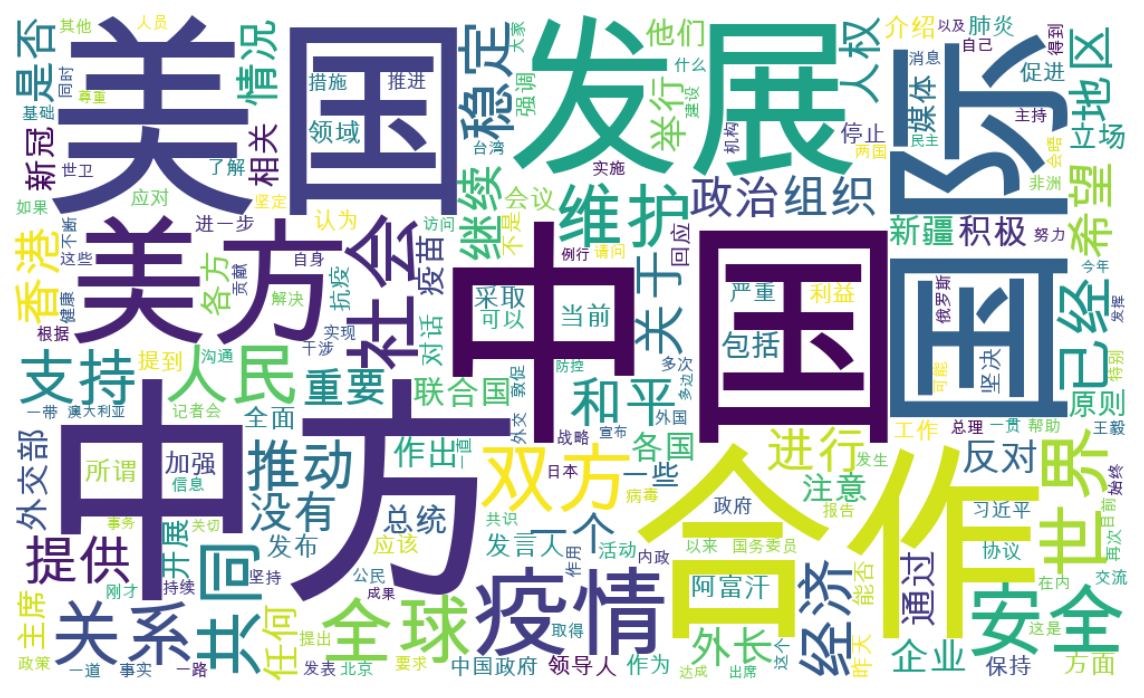

In [98]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

wc = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
              background_color='white',
              width=1000,
              height=600).generate(content)

plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

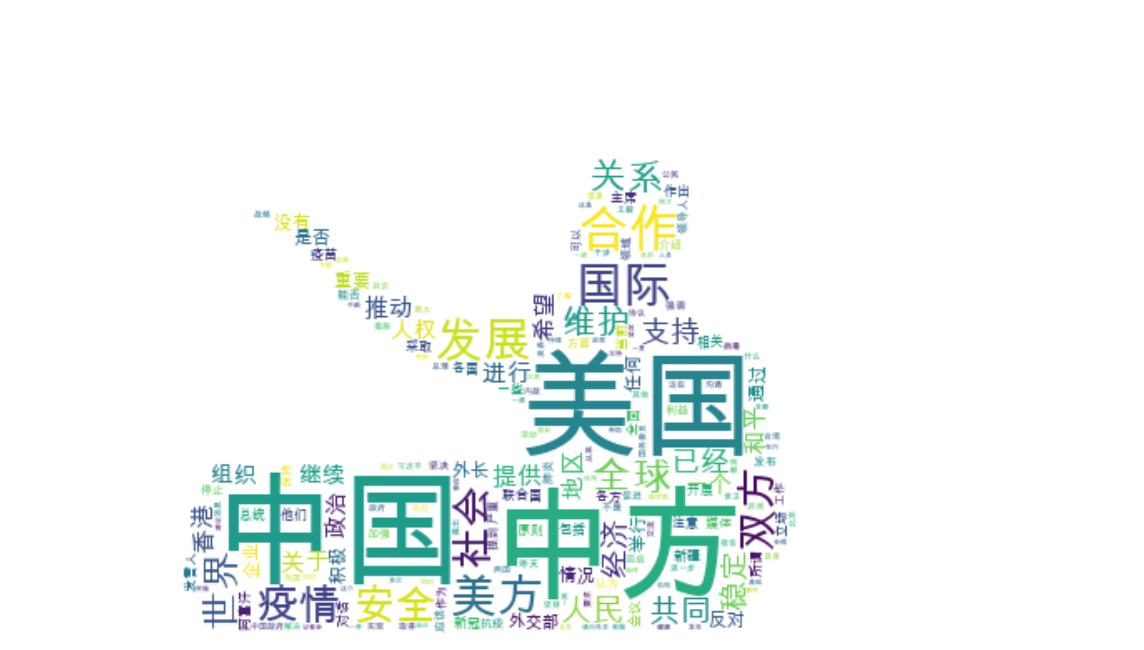

In [99]:
background_pic = 'MFA/Zhao_wbg.png' # picture must have white background
images = Image.open(background_pic)
maskImages = np.array(images)

wc = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
              background_color='white',
              width=1000,
              height=600,
              mask=maskImages).generate(content)

plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

从网上找了最能发言(txt的size最大)的赵副司长的照片，主要要抠成白底，然后做成这个形状的词云图。倒是能看，就是很糊。<br>
从外交部的公开资料显示，华21年晋升为部长助理，兼新闻司司长，汪是副司长，两人都已婚已育。唯独赵副司长没有家庭情况的信息，但是据他在19年发的推特，应该是有一个儿子的，并且彼时才第一次祝父亲节快乐，推想年纪尚小。而赵在20年2月出任新闻发言人，两年多以来金句频出，不仅是可以不用苹果手机（2020年8月27日新闻发布会，“很多中国人表示，如果美国真的禁用了微信，那么苹果手机我们也可以不用用了”），家庭情况也不详了，可谓是把一切都献给了党和国家的外交事业。

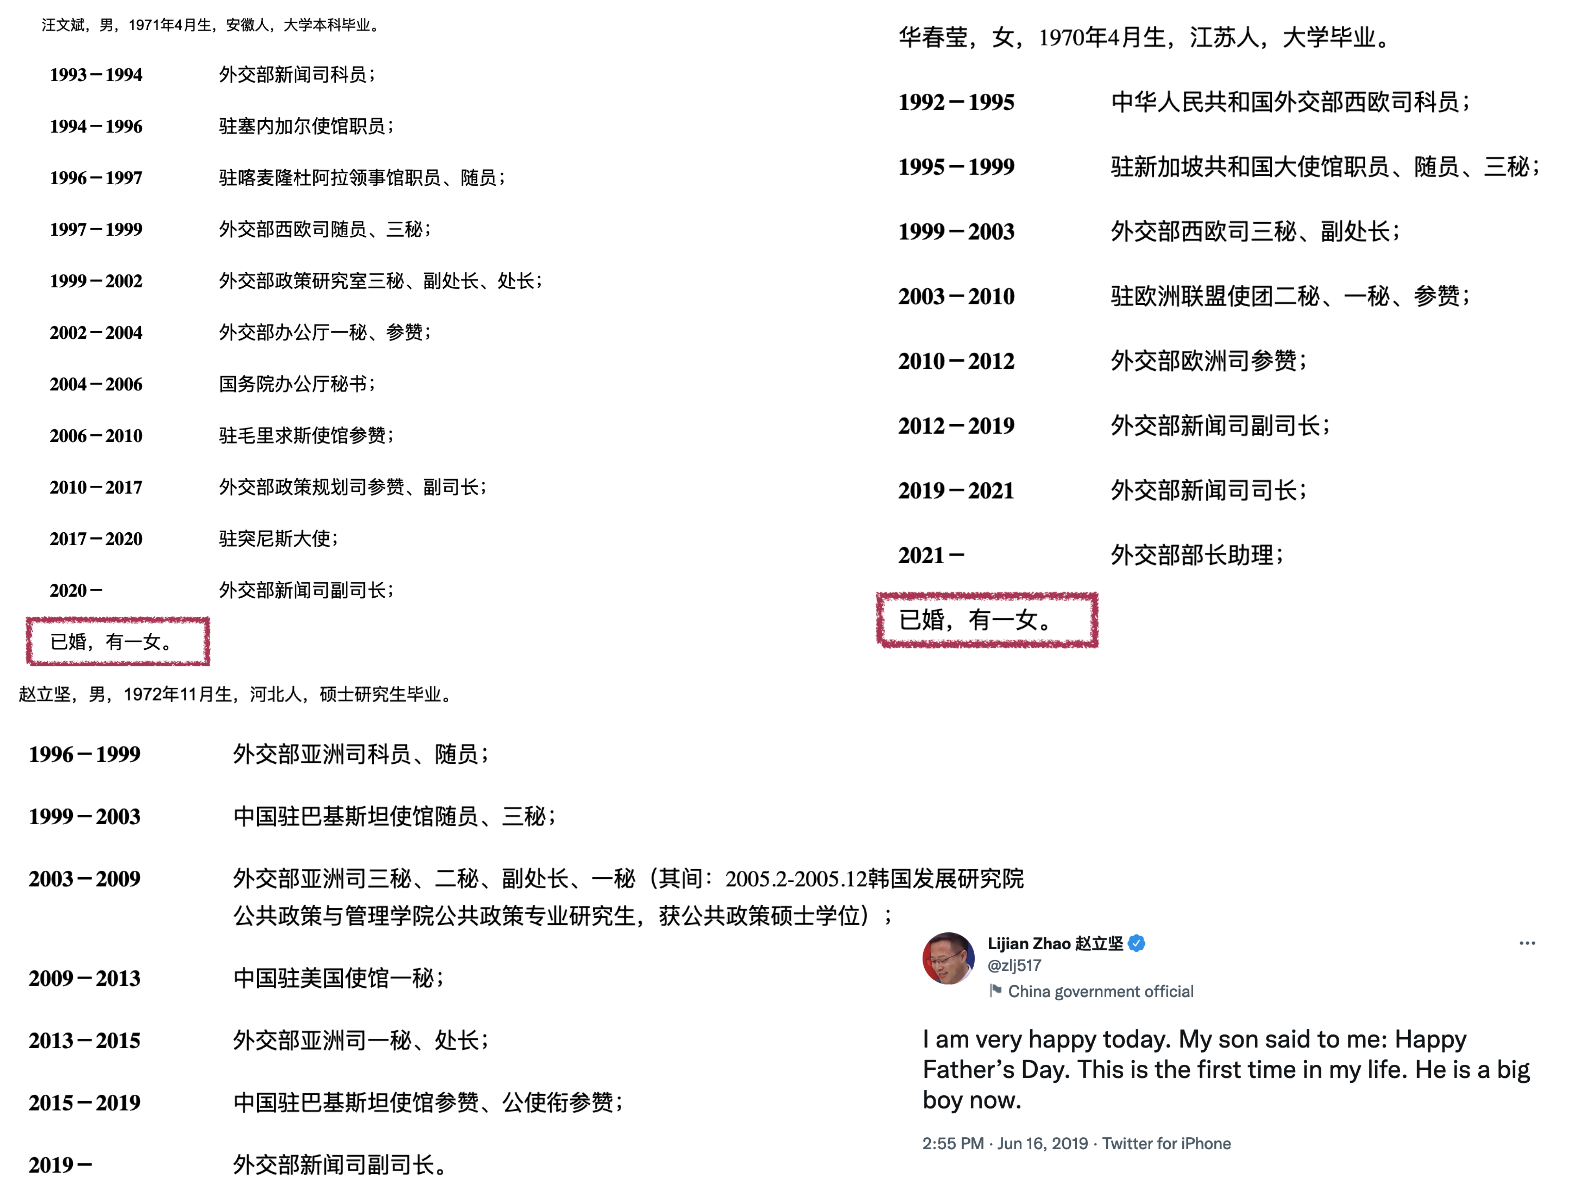

## Most Frequently Mentioned Countries/Regions/Provinces
下面做一个相对进阶的分析，我们想知道哪些国家和地区最常为中国外交部提及。提到最多的国家肯定是中国，提到最多的外国无疑是美国，这都可以很明显地在词云图里看到。但是，提到第二多的外国是哪个呢？相信结论会让你惊讶。

### Scrape Wiki
我们需要一个中文的国家名单的list，似乎没有直接的材料，那么就从wiki上爬取。

In [101]:
url = 'https://zh.m.wikipedia.org/zh-cn/按大洲排列的国家列表'
res = requests.get(url).text
print(res)

<!DOCTYPE html>
<html class="client-nojs" lang="zh-Hans-CN" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>按大洲排列的国家列表 - 维基百科，自由的百科全书</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"zh","wgMonthNames":["","1月","2月","3月","4月","5月","6月","7月","8月","9月","10月","11月","12月"],"wgRequestId":"48af9838-168f-4cf8-82f3-742bea2bf6d5","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"按大洲排列的国家列表","wgTitle":"按大洲排列的国家列表","wgCurRevisionId":72670202,"wgRevisionId":72670202,"wgArticleId":1087689,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgPageContentLanguage":"zh-cn","wgPageContentModel":"wikitext","wgRelevantPageName":"按大洲排列的国家列表","wgRelevantArticleId":1087689,"wgUserVariant":"zh-cn","wgIsProbablyEditable":true,"wgRelevantPageIsProbablyEditable":true,

In [102]:
# 获得所有tables
df_list = [pd.read_html(res)[i] for i in range(len(pd.read_html(res)))]

df = pd.DataFrame()
countryNames = pd.Series()
capitalNames = pd.Series()

# 把各大洲的tables拼接在一起
for i in range(len(df_list)):
    countryNames = pd.concat([countryNames,df_list[i].iloc[:,1]],ignore_index=True)
    capitalNames = pd.concat([capitalNames,df_list[i].iloc[:,2]],ignore_index=True)

df['Country/Region'] = countryNames
df['Capital'] = capitalNames

df

,Country/Region,Capital
0,阿尔及利亚,阿尔及尔
1,安哥拉,罗安达
2,贝宁,波多诺伏
3,博茨瓦纳,哈博罗内
4,英属印度洋领地,迪亚哥加西亚岛
...,...,...
263,瓦利斯和富图纳群岛,马塔乌图
264,布韦岛,布韦岛
265,法属南部领地,法兰西港
266,赫德岛和麦克唐纳群岛,NaN


In [103]:
# 本表其实不完全正确，核验发现
# 俄罗斯出现了两次，欧亚各有，但是土耳其又只出现在亚洲
df[df['Country/Region']=='俄罗斯']

,Country/Region,Capital
96,俄罗斯,莫斯科
156,俄罗斯,莫斯科


In [104]:
df = df.drop_duplicates()
df.shape

(267, 2)

### Output

In [112]:
provinces = ['新疆','西藏','香港','澳门','台湾']
# 本人严正申明:上述五个地区均是中国不可分割的一部分
# statement: above five regions are inalienable parts of China
# wiki的资料里有中华民国，不过有解释，并不为国际社会所承认接受。

tmp = list(df['Country/Region'].values) + provinces
country_region = ' '.join(tmp)
country_region = re.sub('中华人民共和国','中国',country_region)

In [113]:
name = []
freq = []

for i in range(len(result)):
    if result[i][0] in country_region:
        name.append(result[i][0])
        freq.append(result[i][1])
        
country_region_summary = pd.DataFrame()
country_region_summary['Country/Region'] = name
country_region_summary['Frequencies'] = freq
country_region_summary   

,Country/Region,Frequencies
0,中国,25520
1,美国,10813
2,香港,2877
3,新疆,2288
4,阿富汗,1921
5,台湾,1346
6,日本,1274
7,俄罗斯,1180
8,澳大利亚,1100
9,民主,1060


结果很顺利的获得了， 但是存在一些问题，如“中非”肯定是说的中国和非洲，而不是中非这个国家，此外，因为有些国名带有“民主”（民主刚果），“联合”（阿拉伯联合酋长国），所以这些词也被提取出来了，所以需要处理一下。

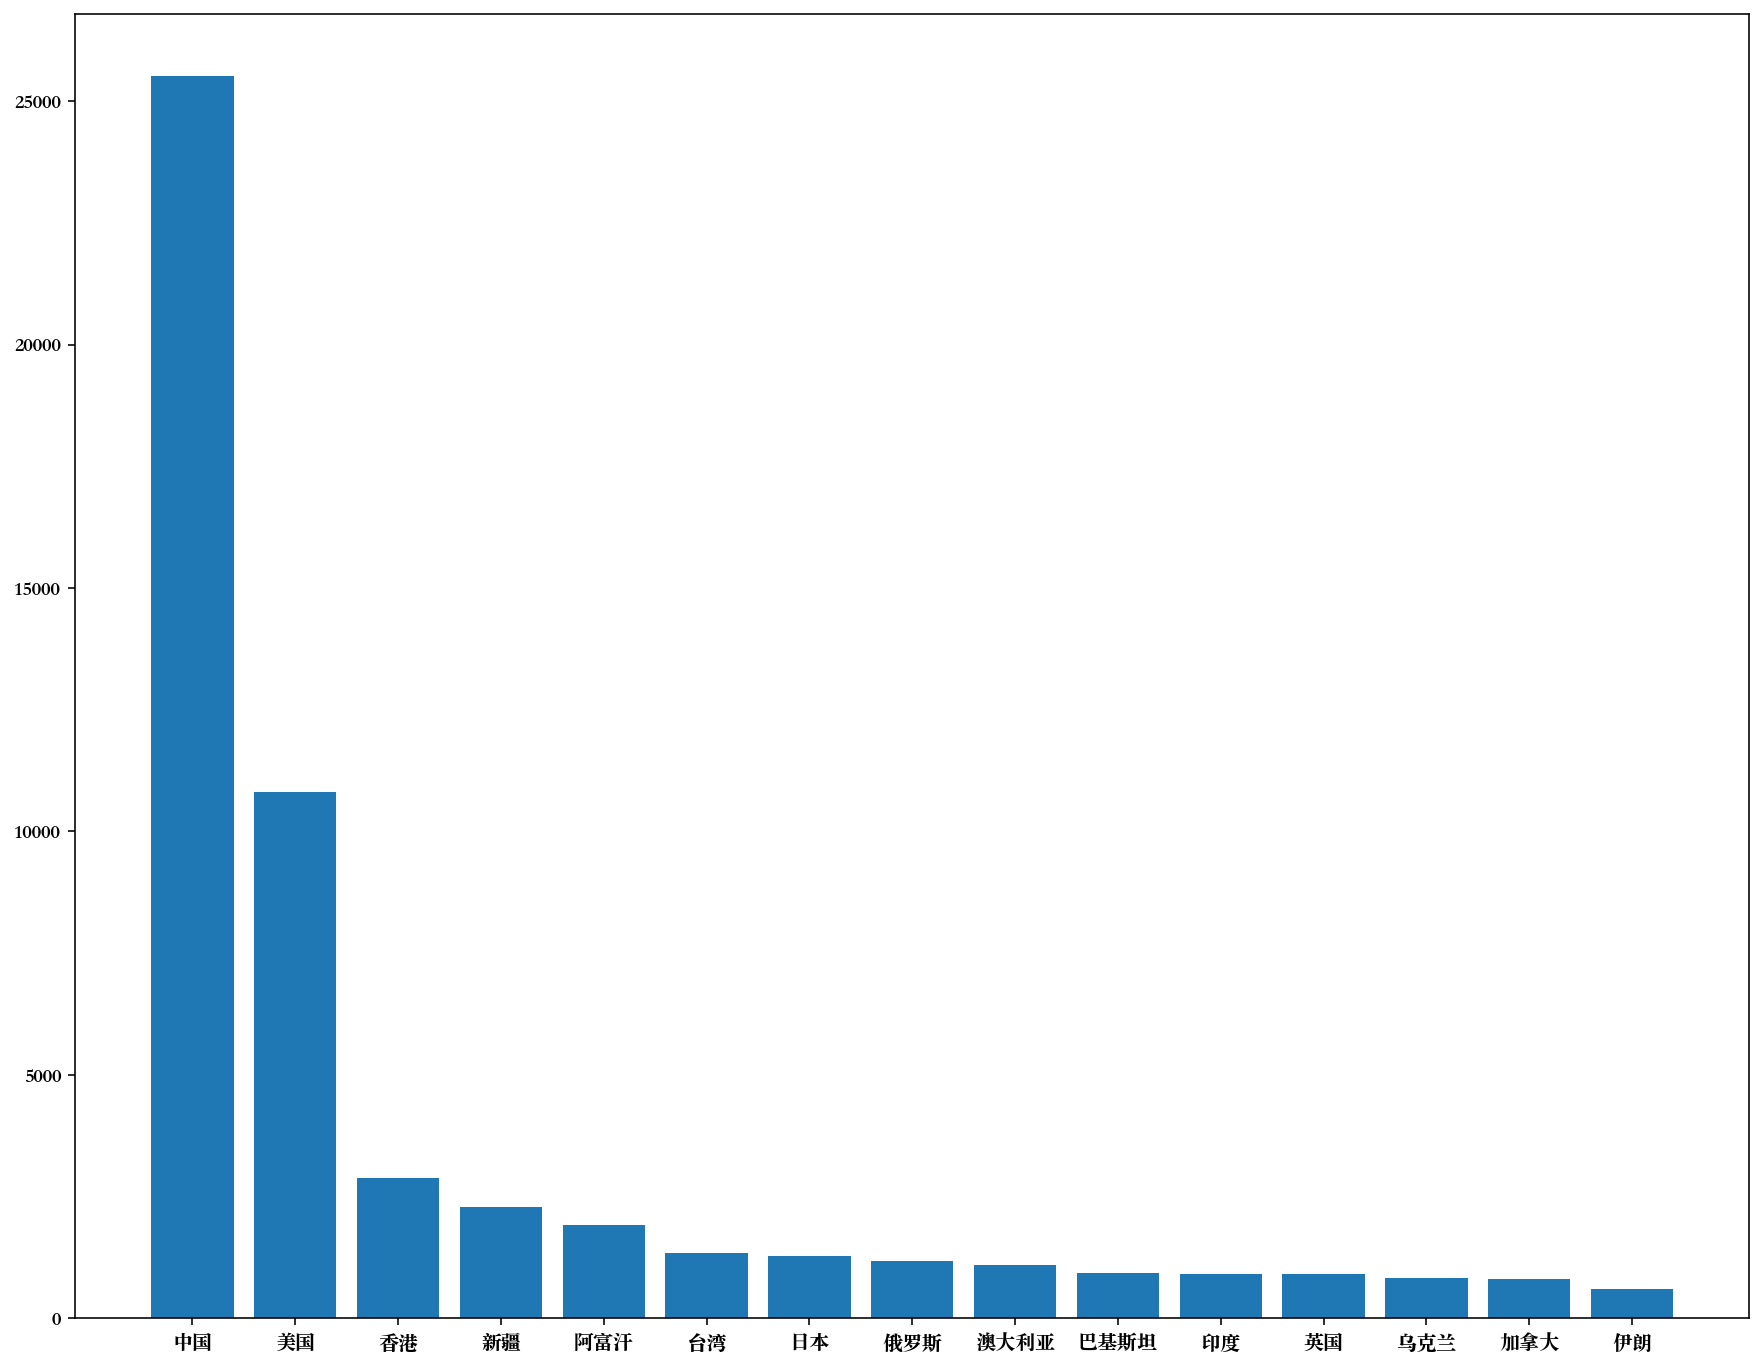

In [136]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Songti SC'] # display Chinese characters

lt = [ country_region_summary[country_region_summary['Country/Region']=='民主'].index[0] ]
lt.append(country_region_summary[country_region_summary['Country/Region']=='联合'].index[0])
lt.append(country_region_summary[country_region_summary['Country/Region']=='中非'].index[0])

country_region_summary = country_region_summary.drop(lt)

plt.figure(figsize=(15,12))
plt.bar(country_region_summary['Country/Region'], country_region_summary['Frequencies'])
plt.show()

# Closing Remark

这里列出些有意思的问题以抛砖引玉，期待更深入的研究：<br>
（1） 对这些国家和地区的态度，可以进行sentimental analysis <br>
猜测对于外国，对俄罗斯，巴基斯坦和伊朗是正面的态度，其余都是负面的。<br>
（2） 对各个年度进行比较，乌克兰想必是22年才开始经常提及，阿富汗应该是21年美军撤军时屡次提到。

还有些技术上的困难需要解决：<br>
（1）“消失的”文稿如何获取，目前只有4年的内容，若长时段分析我国的外交政策，如所谓的“战狼式”外交风格的转变，是否存在如何证明，内容上单薄了些。<br>
（2）BeautifulSoup的提取是获得整场发布会的文稿，最好能够划分成一问一答，这样更方便研究，如和美国相关的问答的情感态度如何，和日本相关的议题主要是什么，等等。